In [204]:
from pyo import *
import os
import matplotlib.pyplot as plt
import numpy as np
import time

In [205]:
#input_names, input_indexes  = pa_get_input_devices()
#output_names, output_indexes = pa_get_output_devices()
#pa_list_devices()

s = Server(sr = 48000,duplex=0,nchnls=1)
s.boot()

s.start()
s.amp=0.9

In [206]:
def drumKickTable(fmin,fmax,lambda_freq=2e-3,lambda_ampl=10e-4,plot=False):
    
    x = np.arange(0,8092)
    norm=len(x)

    freqdrop = np.exp(-lambda_freq*x)
    freq = fmax*freqdrop+fmin*(1-freqdrop) # exponential
    #freq = f0+(0-f0)/(x[-1]-x[0])*(x-x[0]) # linear

    ampldrop = np.exp(-lambda_ampl*x)
    ampl = 1*ampldrop
    
    sgnl = ampl*np.sin(2*np.pi*x/norm*freq)
    
    if plot:
        plt.plot(x,ampl,label='Amplitude')
        plt.plot(x,freqdrop,label='Pitch')
        plt.legend(loc=0)
        plt.show()
        plt.plot(x,sgnl)
        plt.show()
        
    tbl = DataTable(size=len(list(sgnl)), chnls=1, init=[list(sgnl)])
        
    return sgnl,tbl

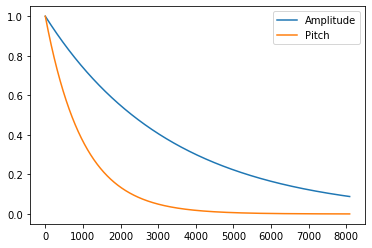

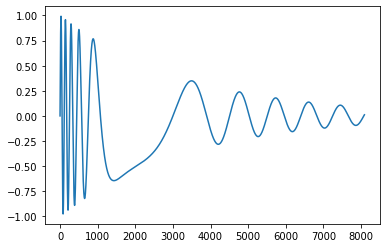

In [207]:
sgnl,tbl = drumKickTable(10,80,lambda_freq = 10e-4, lambda_ampl=3e-4,plot=True)
#sgnl,tbl = drumKickTable(400,400,lambda_freq = 0, lambda_ampl = 0e-4,plot=True)

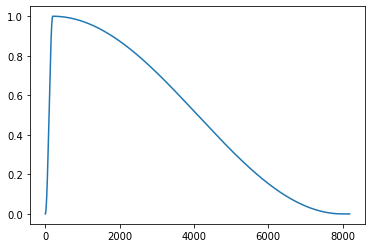

In [208]:
time = 0.5
beat = Metro(time=time,poly=1).play()

envelope = CosTable([(0,0),(200,1),(8000,0.0),(8191,0)])
plt.plot(envelope.getTable())

amplitude = TrigEnv(beat,table=envelope,dur=time,mul=1.0)

freq = 2 # how many of the waveforms to fit in one sec
oscillator1 = Osc(table=tbl,freq=freq,mul=amplitude)
#pitch = TrigXnoiseMidi(beat,dist=1,scale=0,mrange=(1,2))
#oscillator2 = Osc(table=tbl,freq=pitch,mul=amplitude)

In [209]:
oscillator1.out()


< Instance of Osc class >

In [210]:
oscillator1.stop()

< Instance of Osc class >

In [ ]:
s.stop()
s.shutdown()